## 0. Iris flower dataset 

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 



In [251]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load iris dataset
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.



In [252]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [253]:
iris['data'][:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [254]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [255]:
iris['frame'] # empty

In [256]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [257]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [258]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [259]:
iris['filename']

'iris.csv'

In [260]:
iris['data_module']

'sklearn.datasets.data'

&nbsp; b) Now insert the data into a DataFrame.

In [261]:
df_data = pd.DataFrame(iris.data, columns=iris["feature_names"])
df_target = pd.concat(
    [df_data, pd.DataFrame(iris["target"], columns=["species"])], axis="columns"
)
df_target.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [262]:

df_target_names = pd.DataFrame(iris.target_names[iris.target], columns=['species_name'])
df = pd.concat([df_target, df_target_names], axis=1)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [263]:

#species_names = [iris.target_names[i] for i in iris.target]
#df = pd.concat([df_target, pd.DataFrame(species_names, columns=["species_name"])], axis="columns")


&nbsp; c) Do some EDA to get an understanding of the dataset. 

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [265]:
stats =df.drop('species', axis=1).describe().drop('count').T #.apply(lambda x:x.apply('{0:.3f}'.format))
stats

,mean,std,min,25%,50%,75%,max
sepal length (cm),5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [266]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_name'],
      dtype='object')

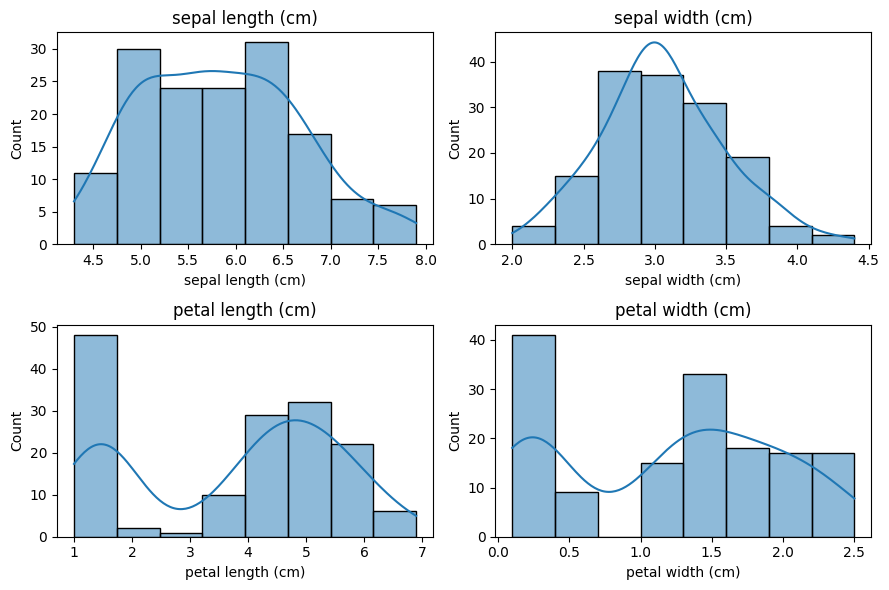

In [267]:

fig = plt.figure(figsize=(9,6)) # shows the figure size
for i, col in enumerate(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']):
 
   ax=plt.subplot(2,2,i+1) # represents subplots two row with four 

   sns.histplot(x= df[col],bins=8, kde=True) # plot hitogram plot with 8 bins 
   ax.set_title(col) # set the tittle

plt.tight_layout() # adjusts the layout of the subplots to prevent overlapping
plt.show() 
 


Text(0, 0.5, 'count')

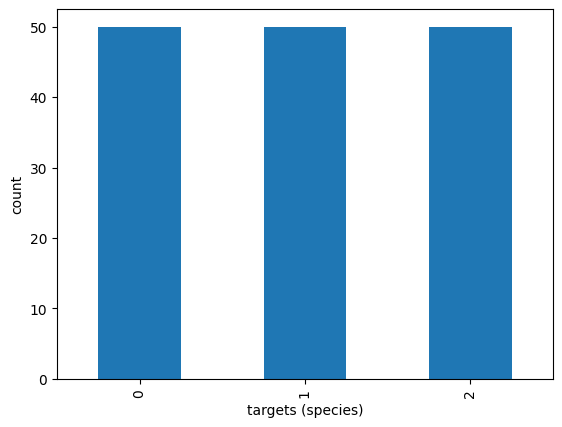

In [268]:
df["species"].value_counts().plot(kind="bar")
plt.xlabel("targets (species)")
plt.ylabel("count")

In [269]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


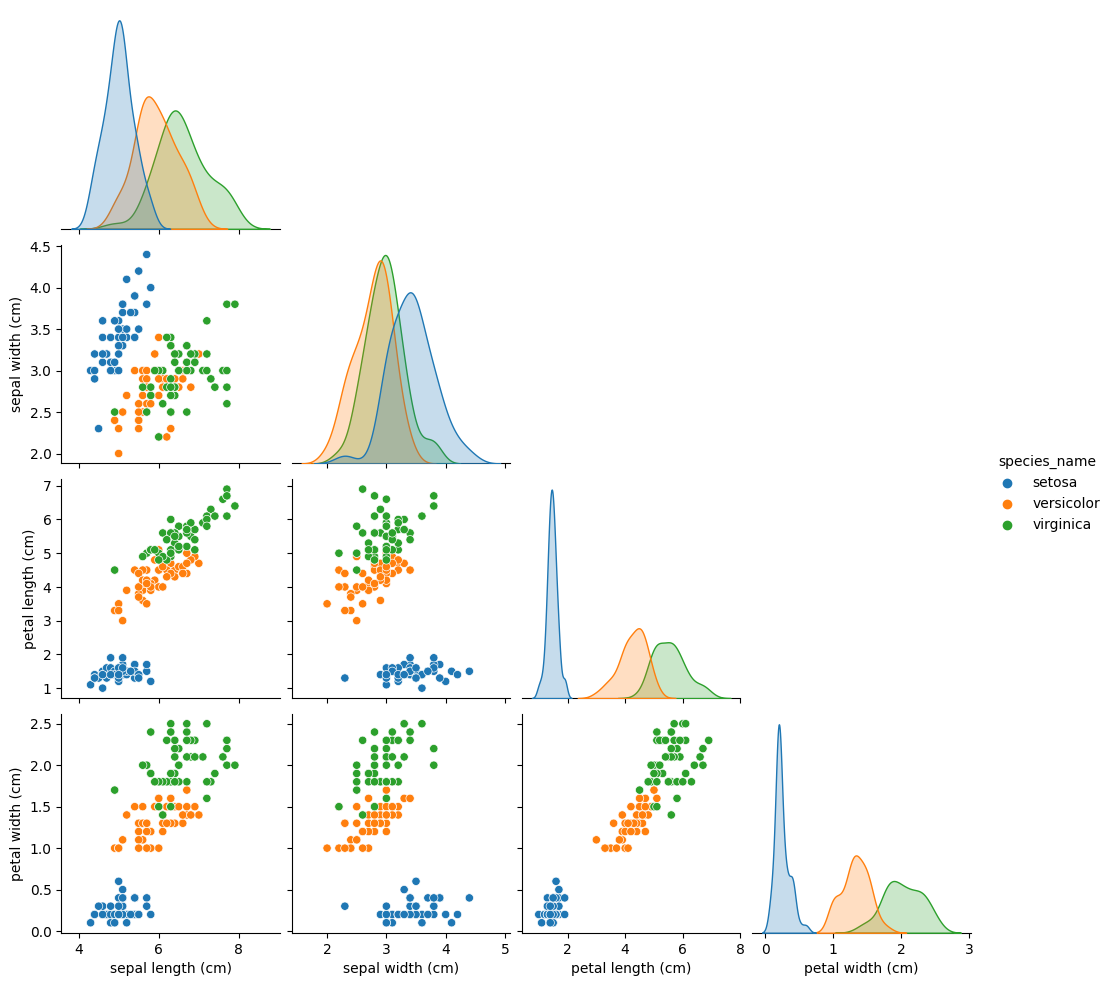

In [270]:
sns.pairplot(df.drop('species', axis=1),hue='species_name',corner=True,palette="tab10")

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

In [271]:
df.corr(numeric_only=True).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

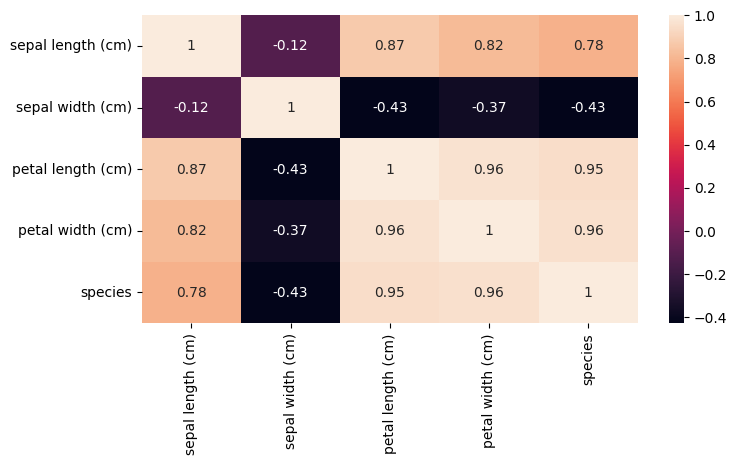

In [272]:
fig = plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True)

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them.


&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

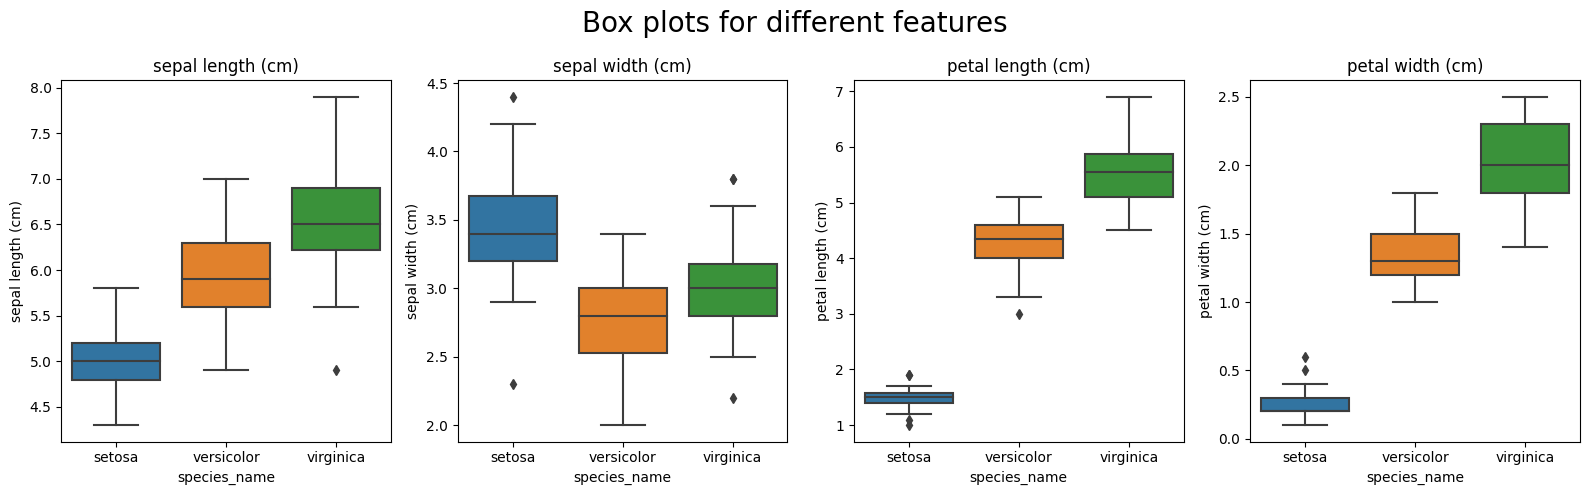

In [273]:
fig = plt.figure(figsize=(16,5)) # shows the figure size


for i, col in enumerate(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']):
 
   ax=plt.subplot(1,4,i+1) # represents subplots two row with four 

   sns.boxplot(x= df['species_name'],y= df[col]) # plot hitogram plot with 8 bins 
   ax.set_title(col) # set the tittle
fig.suptitle('Box plots for different features',fontsize=20)
plt.tight_layout() # adjusts the layout of the subplots to prevent overlapping
plt.show() 


&nbsp; f) Now remove the outliers in data.

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 



In [274]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [275]:

# Define a function to remove outliers using the Tukey method
def remove_outliers_tukey(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers from each numeric column
for col in df.select_dtypes(include=np.number).columns:
    df = remove_outliers_tukey(df, col)

# Print the number of samples for each species after removing outliers
print(df["species_name"].value_counts())


virginica     50
versicolor    49
setosa        47
Name: species_name, dtype: int64


## 1. Split and scale data 

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data.

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop("species_name", axis="columns"), df["species_name"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_test.mean(),scaled_X_train.mean(),scaled_X_test.std(),scaled_X_train.std()

(-0.02889759771531771,
 2.600439909225109e-16,
 1.0272900912814606,
 0.9999999999999999)

## 2. Classify with logistic regression 

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen.

In [277]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)
model.fit(scaled_X_train, y_train)
model.coef_

array([[-2.13163474,  3.68983867, -6.62419859, -6.52812426, -7.52926836],
       [ 1.17029773, -1.85579215,  3.08096778,  2.24142509, -5.96851127],
       [ 0.96133701, -1.83404652,  3.54323081,  4.28669917, 13.49777962]])

## 3. Evaluate model 

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report 


In [278]:
y_pred = model.predict(scaled_X_test)
y_pred

array(['setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica'], dtype=object)

In [279]:
y_test.head(10)


48         setosa
101     virginica
28         setosa
20         setosa
45         setosa
124     virginica
30         setosa
84     versicolor
70     versicolor
19         setosa
Name: species_name, dtype: object

In [280]:
y_pred[:10]

array(['setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa'], dtype=object)

In [281]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 19]], dtype=int64)

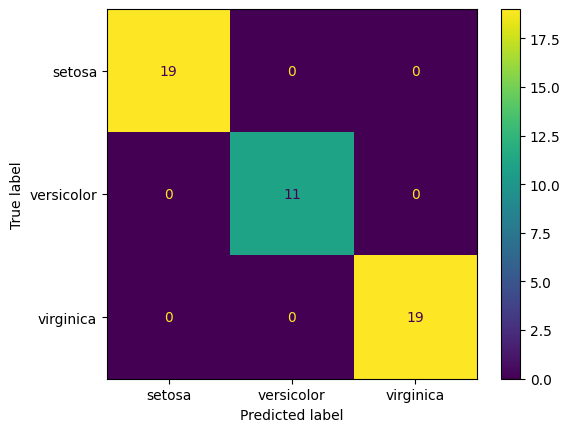

In [282]:
display= ConfusionMatrixDisplay(cm, display_labels = model.classes_)
display.plot()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [283]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        19

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

